In [1]:
# import libraries
import urllib
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np


In [25]:
# url input function
# this is the url for simplicity : https://raw.githubusercontent.com/onaio/ona-tech/master/data/water_points.json
url = input("Enter the data URL: ")
print('Data URL =',url)

# Storing the data
response = urlopen(url)


# storing the JSON response 
# from url in data
data_json = json.loads(response.read())

#create a pandas dataframe
df = pd.DataFrame (data_json)
df.head(5)
df.shape
#checking df information whether there are empty columns and also the datatypes available in the dataset




Enter the data URL: https://raw.githubusercontent.com/onaio/ona-tech/master/data/water_points.json
Data URL = https://raw.githubusercontent.com/onaio/ona-tech/master/data/water_points.json


(712, 48)

In [31]:
#selecting a subset from the dataframe (df) where we only need column 10, column 26
relevant_columns = df[['communities_villages', 'water_functioning']]
#create a new dataframe for the data subsets i.e only the relevant columns
#now we are only going to work with this dataframe, we called it relevant_columnsDF
relevant_columnsDf= pd.DataFrame (relevant_columns)
#Converting the unordered categorical 'Water functioning' , 
#converted the (if functioning is 'yes' replaced it with '1' and if  functioning is 'no' replaced it with '0')
#this is to further check for any data disparencies

relevant_columnsDf.water_functioning =relevant_columnsDf.water_functioning.map({'yes':'1','no':'0'})

print( 'we will be working with this two columns and hence created a dataset called  relevant_columns  if value is 1 then  its functioning \n if the value is 0 then it is not functioning  \n  \n :', relevant_columnsDf )


we will be working with this two columns and hence created a dataset called  relevant_columns  if value is 1 then  its functioning 
 if the value is 0 then it is not functioning  
  
 :     communities_villages water_functioning
0              Gumaryili                 1
1              Selinvoya                 1
2              Selinvoya                 1
3              Selinvoya                 1
4              Selinvoya                 1
..                   ...               ...
707                 Suik                 1
708              Vundema                 1
709              Vundema                 1
710             Jiniensa                 1
711                Jagsa                 1

[712 rows x 2 columns]


In [27]:
#checking if our water_functioning column has any empty or irrelevant /dirty data.
#converting data to categorical helped us identify that there are two elements that are not of type 1 or 0 
relevant_columnsDf['water_functioning' ].value_counts(dropna=False )


1      623
0       87
NaN      2
Name: water_functioning, dtype: int64

In [ ]:
# if water functioning contains a value which is neither 'yes' nor 'no' it eliminates it.
#we eliminated the NAN 
relevant_columnsDf.dropna(subset = ["water_functioning"], inplace=True)


In [ ]:
#clean data
relevant_columnsDf['water_functioning' ].value_counts(dropna=False )

1    623
0     87
Name: water_functioning, dtype: int64

In [32]:
#Each community village and it's total numbe of water points.
relevant_columnsDf['communities_villages' ].value_counts(dropna=False )

Kpatarigu    51
Jagsa        38
Nayoku       35
Guuta        32
Nabulugu     31
             ..
Gumaryili     1
Garigu        1
Kalaasa       1
Suik          1
Jiniensa      1
Name: communities_villages, Length: 65, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


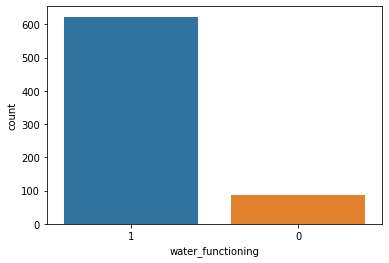

In [17]:
#visualize the waterpoints which are working and those which are not working.
import seaborn as sns
sns.countplot(relevant_columnsDf['water_functioning'])

In [33]:
#look at all the values in each column and get a count using (for val which loops through the entire dataframe)
#the number of occurences per village whichmeans the number of water points per village either functional or unfunctional.
#the number of either fuctioning or unfuctioning water points 
#for val in relevant_columnsDf:
  #  print(relevant_columnsDf[val].value_counts())
#print()

In [36]:
#the output of this cell could further help us deduce that there are 65 communities_villages
CommunityNumberDf= relevant_columnsDf['communities_villages' ].value_counts(dropna=False )
print('the number of villages are equal to \n:', len(CommunityNumberDf) )

#Checking for the total functioning and unfuctioning data points where 1 is yes and 0 is no
#the output shows that there are 623 working points and 87 points which are not working.
relevant_columnsDf['water_functioning' ].value_counts(dropna=False )
workingWaterPointsDf= relevant_columnsDf.loc[relevant_columnsDf['water_functioning' ]=='1']
print ('The number of working water points which are functioning  is \n :' , len(workingWaterPointsDf))
# selecting rows based on condition , this codes selects all rows with a value zero which represents "no" meaning not fuctional.
#Then stores them in a NotFunctional dataframe.
notFunctionalWaterPointsDf = relevant_columnsDf.loc[relevant_columnsDf['water_functioning'] == '0'] 
    
print('\nResult dataframe for water points that are not functioning :\n', 
 len(notFunctionalWaterPointsDf)     )
percentagesDf= notFunctionalWaterPointsDf['communities_villages'].value_counts(normalize=True)*100
print ('percentage of broken water points in rank from highest to lowest is : \n' ,  percentagesDf)

the number of villages are equal to 
: 65
The number of working water points which are functioning  is 
 : 623

Result dataframe for water points that are not functioning :
 87
percentage of broken water points in rank from highest to lowest is : 
 Nayoku         6.896552
Tantala        6.896552
Arigu          6.896552
Jagsa          6.896552
Kpatarigu      5.747126
Kubore         5.747126
Zanwara        4.597701
Zua            4.597701
Zukpeni        4.597701
Loagri_1_      4.597701
Kurugu         4.597701
Nabulugu       4.597701
Namgurima      4.597701
Gbaarigu       3.448276
Bandem         3.448276
Banyangsa      3.448276
Zangu-Vuga     2.298851
Longsa         2.298851
Guuta          2.298851
Soo            2.298851
Selinvoya      1.149425
Gbima          1.149425
Alavanyo       1.149425
Kulbugu        1.149425
Dorinsa        1.149425
Kanwaasa       1.149425
Chanpolinsa    1.149425
Zogsa          1.149425
Name: communities_villages, dtype: float64
